<h1><center> TP2: Pandas, data analysis library </center></h1>

The deadline for report submission is Tuesday, December 8th 2020.

Note: the goal of this TP is to become familiar with 'pandas' class in Python. This library is often used for data analysis and is convenient for manipulation tool.
We consider a case study based on a dataset that contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

We first list the basic function in pandas. PART 1 aims at using pandas as a visualization tools to a better understanding of data. PART 2 shows how easy it is to combine "pandas" dataframes and "sklearn" models to build additional features and predict. 

As a homework, we propose you a very concret problem which is open and for which we are waiting for your creativity (as usual)!

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Short intro into pandas

In [2]:
data = pd.read_csv("bookings.csv") 

In [3]:
data.head(5) # print first 5 entries of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [188]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [189]:
data.columns # print column names

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

This dataset contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

There are 32 columns in this dataset:

1. **hotel** -- one of the two hotels
2. **is_canceled** -- Value indicating if the booking was canceled (1) or not (0)
3. **lead_time** -- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. ....

For the full description of each column please see: https://www.kaggle.com/jessemostipak/hotel-booking-demand

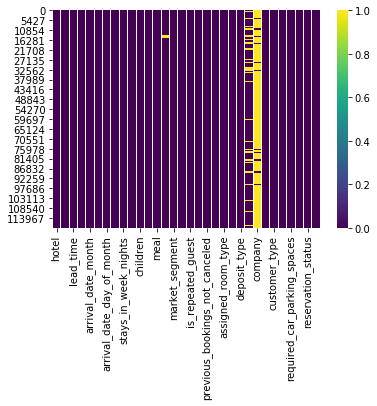

In [190]:
sns.heatmap(data.isna(),cmap='viridis')

In [191]:
data['country'].unique() # we can also print each column of the dataset

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [192]:
data['country'].unique() # list all unique values in the column

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [193]:
data.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

This dataset contains 119390 different reservations. Some of the reservations have missing values.


In [194]:
data.values # A data frame can be converted into a numpy array by calling the values attribute:

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out', '2015-07-02'],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out', '2017-09-07']],
      dtype=object)

However this array cannot be directly fed to a scikit-learn model.

1. the values are heterogeneous (strings for categories, integers, and floating point numbers)
2. some attribute values are missing

# Predicting cancellation: Part I -- visualization

**Our goals** The goal of this part is to provide few examples of visualization combining ```pandas```, ```matplotlib```, ```seaborn```. 

We will look at a very natural and practical task -- predicting cancellation of a given reservation. Of course, the first instinct of the modern 'ML practitioner' is to throw all the data to some neural net and perform bunch of fine-tuning. There are really a lot of problems with such an approach. As a general rule of thumbs: explore your data before building ML pipelines! It is alway more interesting to investigate the data and find human-interpretable patterns.

Pandas allows to manipulate the dataset in a very convenient manner. Those familiar with SQL will certainly appreciate it! 

As the first visualization task let us understand which monthes have the most amount of cancellations.
We start by creating a new dataset that contains the information that we would like to plot.

In [195]:

'''
 We create two datasets for each hotel .groupby("arrival_date_month") will group observations by the month
 and .count() function will simply count the amount of reservations for each month
'''
n_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# same thing we do for the second hotel
n_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [196]:
n_reserv_H1.head() # again we can have a look at the top 5 entries

arrival_date_month
April       3609
August      4894
December    2648
February    3103
January     2193
Name: hotel, dtype: int64

In [197]:
n_reserv_H1['April'] # number of reservation for Resort Hotel for April

3609

In [198]:
n_cancel_H1['April'] # number of cancelled reservations for Resort Hotel

1059

In [199]:
# finally, we gather everything together


data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "month": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_cancel": list(n_cancel_H1.values)})
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "month": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_cancel": list(n_cancel_H2.values)})
data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

# notice how easy it is to add a new column. We simply write the following
data_visual["percent_cancel"] = data_visual["n_cancel"] / data_visual["n_booking"] * 100 # percent of cancelations

In [200]:
data_visual.head() # our final dataset

,hotel,month,n_booking,n_cancel,percent_cancel
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2648,631,23.829305
3,Resort Hotel,February,3103,795,25.620367
4,Resort Hotel,January,2193,325,14.819881


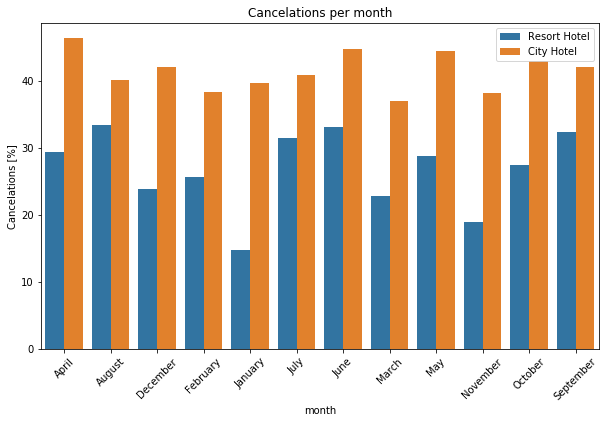

In [201]:
# plotting is simple once we have good dataset.
plt.figure(figsize=(10, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual)
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

Previous plot is nice, but the ordering of the month is very annoying!

**Question 1.** Propose a solution that will re-order the barplot above using standard month ordering. Hint: use ```pd.Categorical()``` function of pandas.

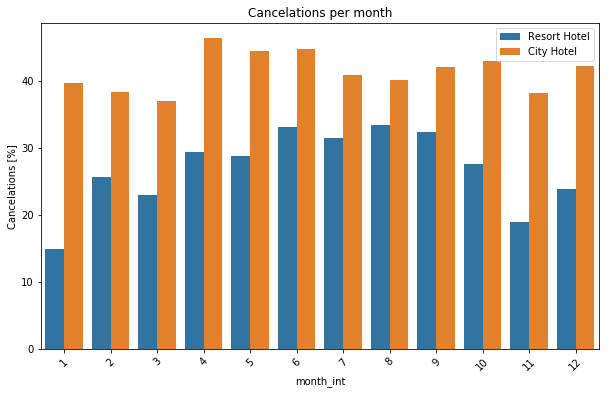

In [202]:
df = data_visual

df['month_int']=pd.to_datetime(df.month, format='%B').dt.month

plt.figure(figsize=(10, 6))
sns.barplot(x = "month_int", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=df)
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

**Question 2.** Provide interpretation of the above plot.

* Much more cancellations in City hotel vs Resort hotel
* no trend => Seems random 

In [203]:
df.sort_values('percent_cancel', ascending= False)

,hotel,month,n_booking,n_cancel,percent_cancel,month_int
12,City Hotel,April,7480,3465,46.323529,4
18,City Hotel,June,7894,3528,44.692171,6
20,City Hotel,May,8232,3653,44.375607,5
22,City Hotel,October,7605,3268,42.971729,10
14,City Hotel,December,4132,1740,42.110358,12
23,City Hotel,September,7400,3110,42.027027,9
17,City Hotel,July,8088,3306,40.875371,7
13,City Hotel,August,8983,3602,40.097963,8
16,City Hotel,January,3736,1482,39.668094,1
15,City Hotel,February,4965,1901,38.288016,2


**Question 3.** What is the most and the second most common country of origin for reservations of each hotel?

In [204]:
#data.groupby(["hotel","country"])['is_canceled'].count().nlargest(4) # no NaN values for 'is_canceled'
print('Largest reservation countries for Resort Hotel')
data.groupby(["hotel","country"])['is_canceled'].size()['Resort Hotel'].nlargest(2)

Largest reservation countries for Resort Hotel


country
PRT    17630
GBR     6814
Name: is_canceled, dtype: int64

In [205]:
#data.groupby(["hotel","country"])['is_canceled'].count().nlargest(4) # no NaN values for 'is_canceled'
print('Largest reservation countries for City Hotel')
data.groupby(["hotel","country"])['is_canceled'].size()['City Hotel'].nlargest(2)

Largest reservation countries for City Hotel


country
PRT    30960
FRA     8804
Name: is_canceled, dtype: int64

**Question 4.** Plot the number of cancelations for repeated and not repeated guests for both hotels.

[]

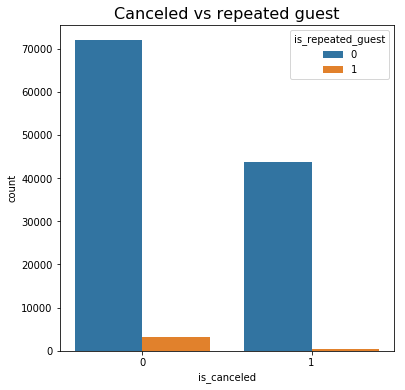

In [206]:
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data)
plt.title("Canceled vs repeated guest", fontsize=16)
plt.plot()

Most guests in these two hotels are not repeated, while the repreated guests are less likely to cancel.

Text(0, 0.5, 'Count')

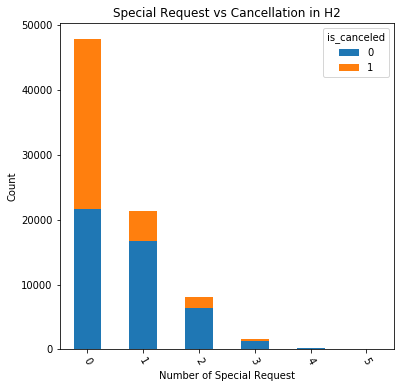

In [207]:
data_req = data[(data['hotel'] == 'City Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

Most of the reservations in the city hotel have no special requests and the cancelation in this case is almost 50/50. However, when special requests are made, the cancelation rate is significantly lower.

**Question 5.** Make the same plot for Resort Hotel. Make your conclusions.

Text(0, 0.5, 'Count')

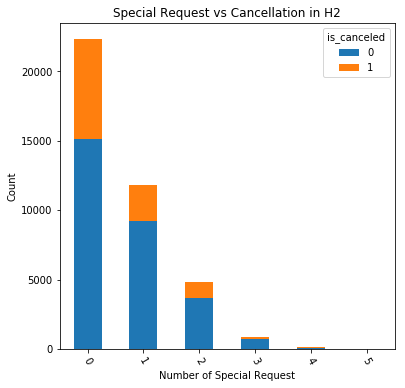

In [208]:
data_req = data[(data['hotel'] == 'Resort Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

 * Special request is a good indicator for forecasting the probability of canceling


# Predicting cancellations: Part II -- ML

**Our goals** The main message here is -- do not re-invent the wheel. The following few lines of code highlight the simplicity with which we can combine ```pandas``` dataframes and ```sklearn``` models. By learning few simple tools (i.e. ```pipeline```, ```gridsearchcv```) our code becomes readable, compact, and can be used to build extra features on top of it.

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [210]:
numeric_features = ["lead_time", "arrival_date_week_number", "total_of_special_requests"]
categorical_features = ["hotel", "market_segment","deposit_type","customer_type"]
features = numeric_features + categorical_features
X = data.drop(["is_canceled"], axis=1)[features]
y = data["is_canceled"]

Before using any ML algorithm from sklearn we need to handle missing values. There is no unique answer on how to deal with missing values in your dataset. We will use possibly the simplest approach. First of all if the feature is numerical and is misisng, we are going to replace it with zero. Secondly, if the feature is categorical and is missing, then we are going to define a new category and call it ```Not defined```.

In [211]:
numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

**Question:** What is ```OneHotEncoder()```? Why do we use it in our case?

* ```OneHotEncoder()``` serves as mapping of categorical features( usually strings) to a category bin

Now imagine a situation when you want to try a lot of different models and for each model you want to make some cross-validation to select the best hyperparameters. On top of that you want to preprocess the data so that you feed something meaningfull into each method.

The next chunk of code shows how to do it.

In [57]:
##  Filtering future warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [213]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for logreg
{'mean_fit_time': array([0.41385341, 0.44796197, 0.48830414, 0.45024681, 0.45690751]), 'std_fit_time': array([0.00267067, 0.02407982, 0.00761952, 0.04078518, 0.03085782]), 'mean_score_time': array([0.05710236, 0.05941765, 0.05826648, 0.05887206, 0.05908879]), 'std_score_time': array([0.00271001, 0.00518248, 0.00113934, 0.00171406, 0.00093641]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70151766, 0.7012664 , 0.70003518, 0.69815066, 0.69402985]), 'split1_test_score': array([0.78264147, 0.78246557, 0.78221429, 0.78221429, 0.78221429]), 'split2_test_score': array([0.73610413, 0.73582772, 0.73582772, 0.736079  , 0.73628003]), 'mean_test_score': array([0.74008711, 0.73985258, 0.73935841, 0.73881397, 0.73750

**Question:** In the previous example we again encounter the convergence problem. Of course we can set higher number of iterations, but it is time consuming. As you have seen, proper normalization can resolve the issue. Insert a normalization step in the pipeline. Note that we do not want to normalize the categorical data, it simply does not make sense. Be careful to normalize only the numerical data. Did it resolve the warning?




In [240]:
numeric_transformer = Pipeline(steps =[('scaler',StandardScaler()),('imputer',SimpleImputer(strategy="constant", fill_value=0))])
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [241]:
models = [("logreg_with_scale", LogisticRegression(max_iter=500))]
grids = {"logreg_with_scale" : {'logreg_with_scale__C': np.logspace(-2, 2, 5, base=2)}}

# cast int to float to avoid Standard scaler error :

X[numeric_features] = X[numeric_features].astype(float)

for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Results for logreg_with_scale
{'mean_fit_time': array([0.38564428, 0.4455723 , 0.5082198 , 0.55318753, 0.63874102]), 'std_fit_time': array([0.01105551, 0.01342574, 0.03612583, 0.07010904, 0.07732663]), 'mean_score_time': array([0.06678041, 0.06736565, 0.06865764, 0.07045825, 0.06859152]), 'std_score_time': array([0.00415537, 0.00391472, 0.00174919, 0.00189687, 0.00317052]), 'param_logreg_with_scale__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg_with_scale__C': 0.25}, {'logreg_with_scale__C': 0.5}, {'logreg_with_scale__C': 1.0}, {'logreg_with_scale__C': 2.0}, {'logreg_with_scale__C': 4.0}], 'split0_test_score': array([0.13134156, 0.13134156, 0.13134156, 0.13134156, 0.13134156]), 'split1_test_score': array([0.93788477, 0.93788477, 0.93788477, 0.93785964, 0.93785964]), 'split2_test_score': array([0.9378832, 0.9378832, 0.9378832, 0.9378832, 0.9378832]), 'mean_tes

In [242]:
print('best parameter C : ',clf.best_params_)

best parameter C :  {'logreg_with_scale__C': 0.25}


**Question:** As we can see, previous code uses only logistic regression. Modify the above code inserting your favorite ML method.

**Remark:** Note that in this part we picked only a small subset of features. We could have used other features as well.


In [ ]:
#models = [("random_forest", RandomForestClassifier())]
#grids = {"random_forest" : {'random_forest__n_estimators': [500,800,900]}}
#
## cast int to float to avoid Standard scaler error :
#
#X[numeric_features] = X[numeric_features].astype(float)
#
#for name, model in models:
#    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
#    clf = GridSearchCV(pipe, grids[name], cv=3)
#    clf.fit(X, y)
#    print('Results for {}'.format(name))
#    print(clf.cv_results_)

# The homework

**The story!**
You are a data scientist working for the hotel, one day the manager comes and tells you.

In our hotels we have an option to offer a parking spot, which costs money. Apparently, not every customer is aware that we have such an option. I really want to offer parking spots for everyone who needs it, because the hotel can earn more money like that. Look, I can send an SMS notification to our customers. Of course SMS are not free, and, moreover, people get very much angry if they receive stupid notifications for no reason. For each new reservation, I would like to decide if I should or shouldn't send the notification to the customer.

**Problem** Explore your data to help the manager and construct a prediction algorithm, using the above template as an inspiration. 

**Warning!** Be aware, that some columns are not actually avaiable at the moment of reservation. For instance, the target column ```is_canceled``` from the previous part clearly cannot be observed at the moment when we need to decide to send the SMS.

## Data exploration

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
data_resort = data[data['hotel']=='Resort Hotel']

data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [169]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Ideas

* Children 
* Length of stay ( use regplot)
* Booking per market segment


In [170]:
data_resort['required_car_parking_spaces']= data_resort['required_car_parking_spaces'].apply(lambda x : 1 if x>0 else 0 )

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [171]:
data_resort['required_car_parking_spaces'].value_counts()

0    34570
1     5490
Name: required_car_parking_spaces, dtype: int64

we have => Skewed data

In [172]:
data_resort['has_kids']=data_resort['babies']+data_resort['children']
data_resort['has_kids']= data_resort['has_kids'].apply(lambda x : 1 if x>0 else 0 )

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[]

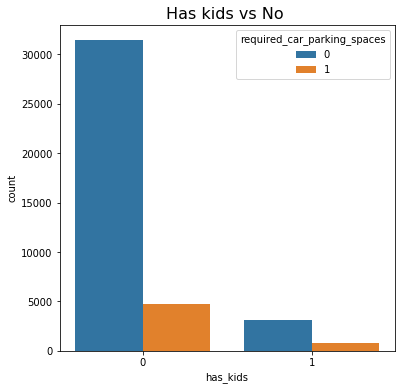

In [173]:
plt.figure(figsize=(6, 6))
sns.countplot(x="has_kids", hue="required_car_parking_spaces", data=data_resort)
plt.title("Has kids vs No ", fontsize=16)
plt.plot()

### How country impact parking space

In [175]:
need_parking_country= data_resort.groupby('country')['required_car_parking_spaces'].sum().sort_values(ascending=False)

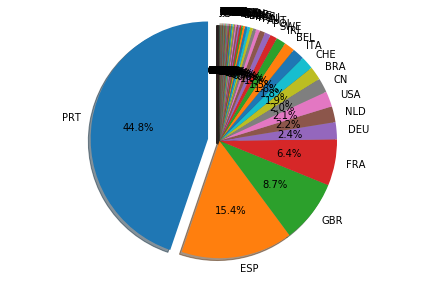

In [176]:
labels = need_parking_country.keys()
number = need_parking_country.array
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = [0.1]+[ 0 for i in range(len(number)-1)]  
fig1, ax1 = plt.subplots()
ax1.pie(number, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

> We clearly see that most country reservation are made in portugal

Let's divide it by number of reservations first

In [177]:
data_by_country=data_resort.groupby('country')['required_car_parking_spaces'].agg(['sum','count'])

data_by_country['percentage_required']=data_by_country['sum'] / data_by_country['count']

In [178]:
data_by_country[data_by_country['count']>data_by_country['count'].median()].sort_values(by='percentage_required',ascending= False).head()

,sum,count,percentage_required
country,,,
SRB,3,7,0.428571
AGO,9,24,0.375000
URY,3,8,0.375000
HRV,4,11,0.363636
ARG,20,57,0.350877


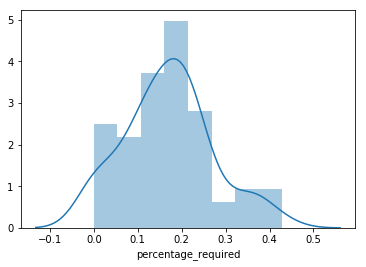

In [179]:
dummy =data_by_country[data_by_country['count']>data_by_country['count'].median()]['percentage_required']
sns.distplot(dummy)

In [180]:
y= data['required_car_parking_spaces'].apply(lambda x : 1 if x>0 else 0 )
y.value_counts() / len(y)

0    0.937884
1    0.062116
Name: required_car_parking_spaces, dtype: float64

In [181]:
y.value_counts()

0    111974
1      7416
Name: required_car_parking_spaces, dtype: int64

 Problem we have **imbalanced data**  ratio of 1:15
> we need to do better that the dummy classification

### Feature enginering

In [4]:
df = data.copy()

In [5]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)) or ((data['adults'] > 0) & (data['babies'] > 0)) :
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

In [6]:
df = feature(df)
df = df.drop(columns = ['company','adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

In [7]:
df['required_car_parking_spaces']=df['required_car_parking_spaces'].apply(lambda x : 1 if x>0 else 0 )
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,0,Transient,0.0,0,0,Check-Out,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,0,Transient,0.0,0,0,Check-Out,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,Transient,75.0,0,0,Check-Out,0,1.0,0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,Transient,75.0,0,0,Check-Out,0,1.0,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,Transient,98.0,0,1,Check-Out,0,2.0,0,2


### Visualizing in latent space

We have a sparse problem so we need to 

In [161]:
from sklearn.decomposition import TruncatedSVD

from sklearn.manifold import TSNE

In [ ]:
# Dropping unknown columns
df = df.drop(columns = ['is_canceled'])

In [163]:
## All categorical columns
categorical_features = list(df.dtypes.where(df.dtypes== object).dropna().index)
numeric_features =  list(df.dtypes.where(df.dtypes != object).dropna().index)

features = numeric_features + categorical_features
X = df[features]
y= df['required_car_parking_spaces'].apply(lambda x : 1 if x>0 else 0 )

In [164]:
numeric_transformer = Pipeline(steps =[('scaler',StandardScaler()),('imputer',SimpleImputer(strategy="constant", fill_value=0))])
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [ ]:
X[numeric_features] = X[numeric_features].astype(float)

pipe = Pipeline(steps=[('preprocessor', preproc), ("tsne", TSNE(n_components=2))])
X_r = pipe.fit(X).transform(X)

In [ ]:
(fig, subplots) = plt.subplots(1, 4, figsize=(15, 8))
perplexities = [5, 30, 50]

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(X_r[y == i, 0]
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

Text(0.5, 1.0, 'Truncated SVD of representation dataset')

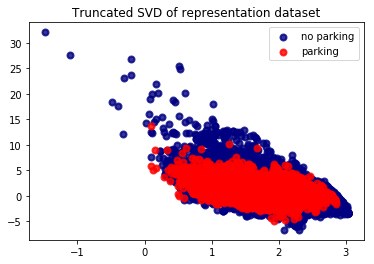

In [14]:
colors = ['navy', 'red']
lw = 2
target_names =['no parking','parking']
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Truncated SVD of representation dataset')

### Automatic Feature selection

In [60]:
from sklearn.feature_selection import SelectKBest


### Training

In [16]:
# Simple model
categorical_features = list(df.dtypes.where(df.dtypes== object).dropna().index)
numeric_features =  list(df.dtypes.where(df.dtypes != object).dropna().index)
numeric_features.remove('required_car_parking_spaces')
features = numeric_features + categorical_features
X = df[features]
y= df['required_car_parking_spaces'].apply(lambda x : 1 if x>0 else 0 )

In [ ]:
X = X.drop(columns = ['required_car_parking_spaces'])

In [18]:
numeric_transformer = Pipeline(steps =[('scaler',StandardScaler()),('imputer',SimpleImputer(strategy="constant", fill_value=0))])
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [19]:
print('Training on X  shape : ',X.shape)
print('Training on y  shape : ',y.shape)

Training on X  shape :  (119390, 28)
Training on y  shape :  (119390,)


In [101]:
models = [("logreg_with_scale", LogisticRegression(max_iter=1000)),("svc",SVC()),("random_forest", RandomForestClassifier())]

#models = [("logreg_with_scale", LogisticRegression(max_iter=10000))]

#models = [("svc",SVC())]

grids = {"logreg_with_scale" : {'logreg_with_scale__C': np.logspace(-2, 2, 5, base=2)}, 
         "svc" :{'svc__gamma':np.logspace(-4, 1, 10)},
         "random_forest" : {'random_forest__n_estimators': [800]}}

# cast int to float to avoid Standard scaler error :

X[numeric_features] = X[numeric_features].astype(float)

for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    #print(clf.cv_results_)
    print("Mean test score :", clf.cv_results_['mean_test_score'])

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Results for logreg_with_scale
Mean test score : [0.93713038 0.93707962 0.93730805 0.93733343 0.93718115]
Results for svc
Mean test score : [0.93766339 0.93766339 0.93766339 0.93766339 0.93768877 0.93773954
 0.93773954 0.93746034 0.93746034 0.93809488]
Results for random_forest
Mean test score : [0.9386025]


### Retriving Models trained on GCP

In [146]:
# load the model from disk
RF_path ='Models/random_forest_model.pkl'
LR_path ='Models/logreg_with_scale_model.pkl'

RF_model = pickle.load(open(RF_path, 'rb'))

### Analysing results

In [159]:
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

##### Plotting Confusion matrix

Classification report for classifier :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36843
           1       1.00      0.98      0.99      2556

    accuracy                           1.00     39399
   macro avg       1.00      0.99      0.99     39399
weighted avg       1.00      1.00      1.00     39399




DummyClassifier(strategy='most_frequent')

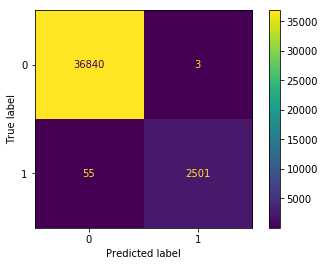

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

y_pred = RF_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print("Classification report for classifier :\n%s\n"
      % (classification_report(y_test, y_pred)))

Classification report for classifier :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     36843
           1       0.00      0.00      0.00      2556

    accuracy                           0.94     39399
   macro avg       0.47      0.50      0.48     39399
weighted avg       0.87      0.94      0.90     39399




/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


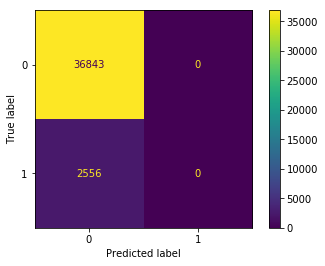

In [156]:
## Comparing to Dummy classfier
model = DummyClassifier(strategy='most_frequent') # generates predictions by respecting the training set’s class distribution.
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print("Classification report for classifier :\n%s\n"
      % (classification_report(y_test, y_pred)))

##### Plotting ROC Curve

> ROC analysis does not have any bias toward models that perform well on the minority class at the expense of the majority class—a property that is quite attractive when dealing with imbalanced data

AUCROC can be interpreted as the probability that the scores given by a classifier will rank a 
randomly chosen positive instance higher than a randomly chosen negative one

This single score can be used to compare binary classifier models directly. As such, this score might be the most commonly used for comparing classification models for imbalanced problems.

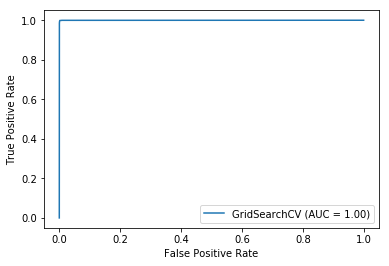

In [147]:
svc_disp = plot_roc_curve(RF_model, X_test, y_test)

#### Plotting Precision Recall Curve

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.06')

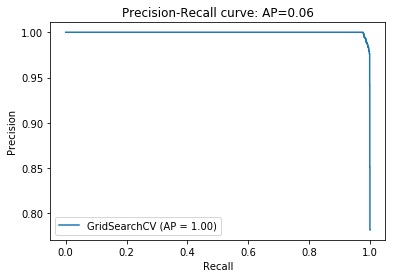

In [160]:
disp = plot_precision_recall_curve(RF_model, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))